In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mayavi import mlab
import mayavi
import cv2
import matplotlib.image as mpimg

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



%matplotlib inline

cwd = os.getcwd()

********************************************************************************
         to build the TVTK classes (6.2). This may cause problems.
         Please rebuild TVTK.
********************************************************************************



In [2]:
#load all the frames
all_frames = np.asarray(np.load(cwd + "/approach_1.bag_format_XYZIR.npy"))

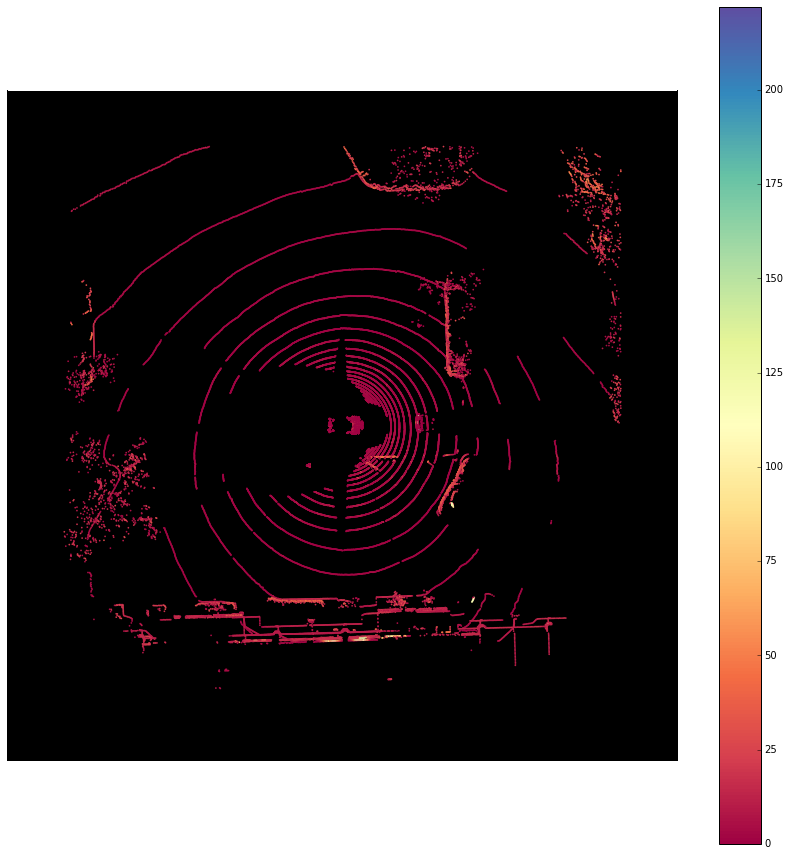

In [3]:
sample = np.asarray(all_frames[85])

x_s = []
y_s = []
z_s = []
i_s = []
r_s = []
for x,y,z,i,r in sample:
    if abs(x) <= 25 and abs(y) <=25:
        x_s.append(x)
        y_s.append(y)
        z_s.append(z)
        i_s.append(i)
        r_s.append(r)

# print "Top Down Plot coloured based on intensity"

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=i_s, s=3, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
plt.colorbar(sc)
plt.show()

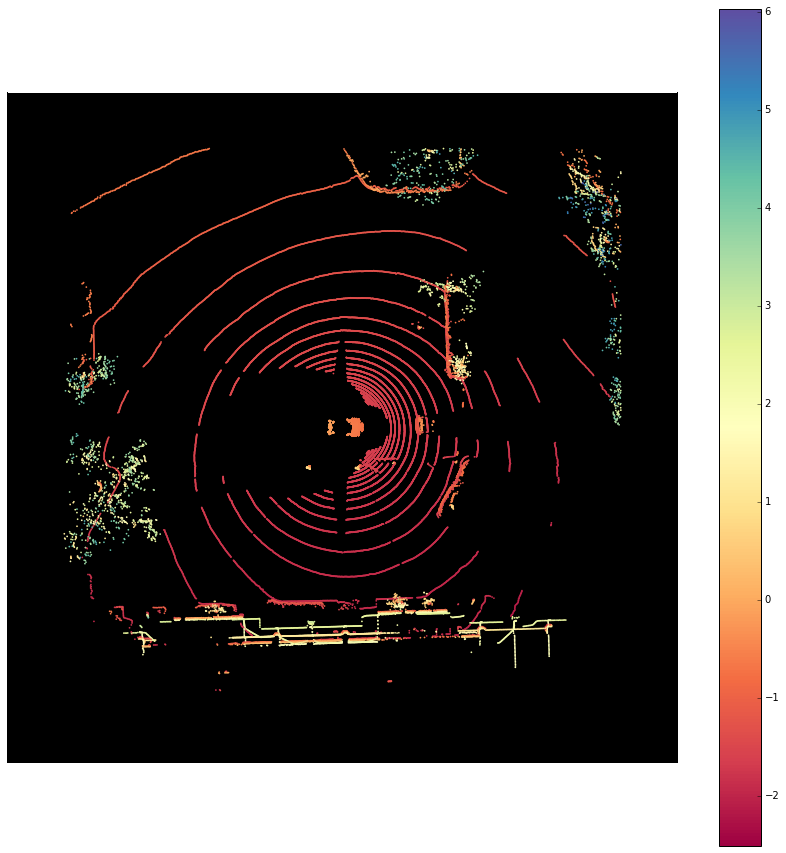

In [4]:
# print "Top Down Plot coloured based on height"

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
plt.colorbar(sc)
plt.show()

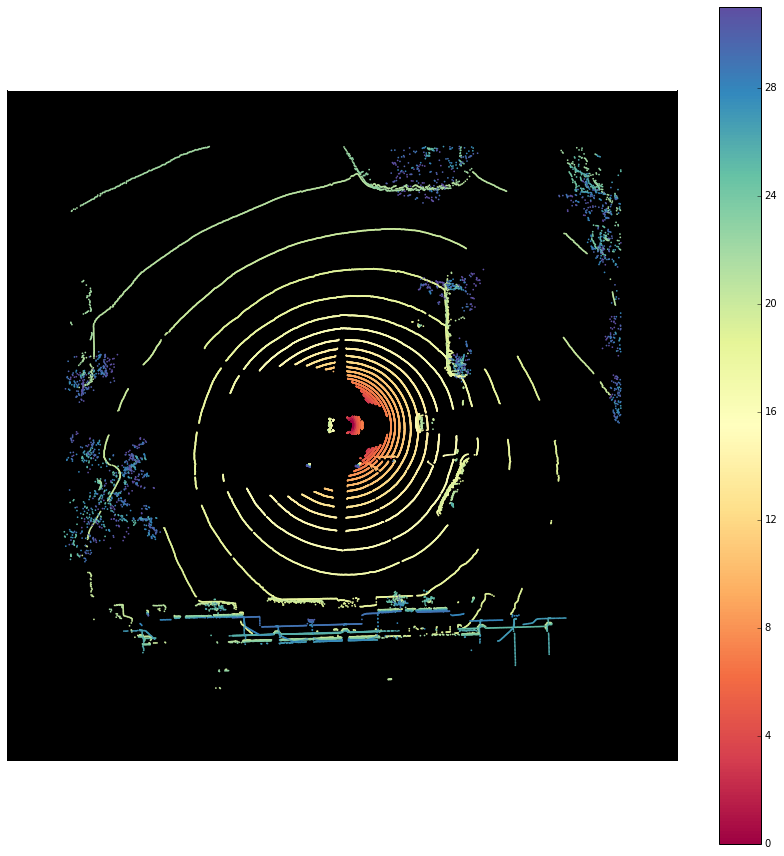

In [5]:
# print "Top Down Plot coloured based on ring"

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=r_s, s=3, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
plt.colorbar(sc)
plt.show()

In [6]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -24.882352829 24.9863014221 32916
y-axes limits:  -23.5782279968 24.9812545776 32916
z-axes limits:  -2.50880241394 6.03114461899 32916
i-axes limits:  0.0 222.0 32916
r-axes limits:  0.0 31.0 32916


In [7]:
#keep values
x_s2 = x_s[:]
y_s2 = y_s[:]
z_s2 = z_s[:]
i_s2 = i_s[:]
r_s2 = r_s[:]

In [8]:
def reset_points():
    global x_s
    global y_s
    global z_s
    global i_s
    global r_s
    global x_s2
    global y_s2
    global z_s2
    global i_s2
    global r_s2
    #run this reset them
    x_s = x_s2[:]
    y_s = y_s2[:]
    z_s = z_s2[:]
    i_s = i_s2[:]
    r_s = r_s2[:]

In [9]:
reset_points()

In [10]:
#done this way because del_ rearranges the array, error will be: Error: out of index!
del_indeces = []
del_count = 0

print(len(z_s))

for i in range(len(z_s)):
    if z_s[i] > 2.2 or z_s[i] < 0.3:
        del_indeces.append(i-del_count)
        del_count += 1
        
for index in del_indeces:
    del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]    

32916


In [11]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -24.882352829 24.9851379395 2834
y-axes limits:  -21.5060520172 24.9276695251 2834
z-axes limits:  0.323251515627 2.19966220856 2834
i-axes limits:  0.0 127.0 2834
r-axes limits:  24.0 31.0 2834


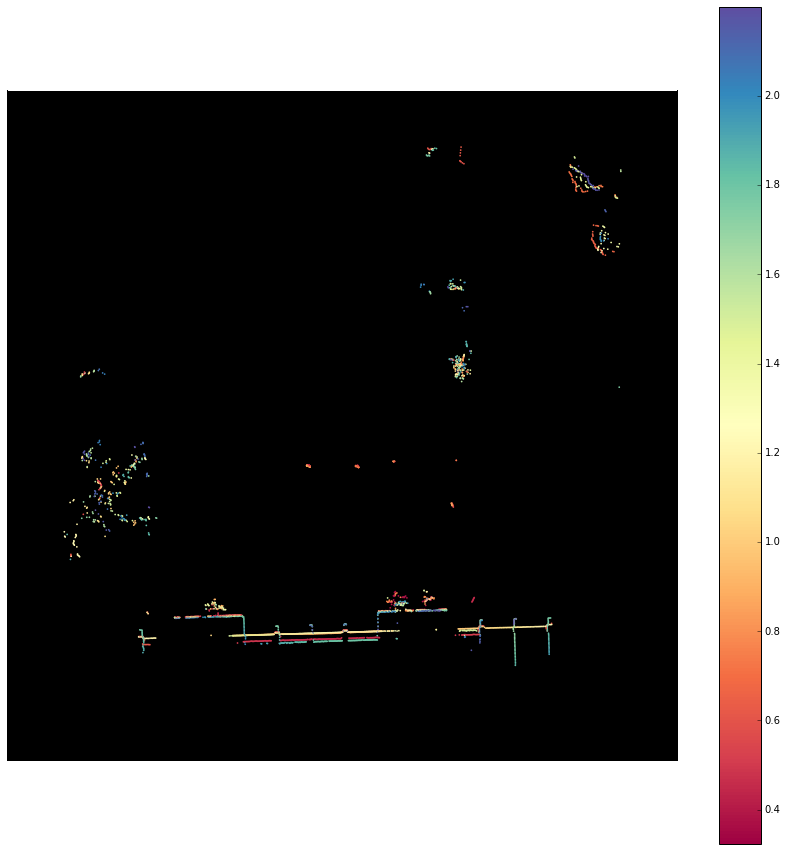

In [12]:
# print "Top Down Plot coloured based on ring"

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
plt.colorbar(sc)
plt.show()

In [13]:
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(500, 500))

mayavi.mlab.points3d(x_s, y_s, z_s,
                     i_s, # distance values for color
                     mode="point",
                     colormap='spectral',
                     figure=fig,
                     )
mayavi.mlab.show()

In [14]:
reset_points()

## Something wrong right?

### If you noticed in Rviz if turn on the plane, you'll see it's on top of the car where the sensor is, so I tried to take the ground reference from below zero...
![Car height image](http://www.jpk.ie/db/Gallery/Gallery-Images/Vehicles.jpg?ImageStamp=36748)

In [15]:

reset_points()
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))


x-axes limits:  -24.882352829 24.9863014221 32916
y-axes limits:  -23.5782279968 24.9812545776 32916
z-axes limits:  -2.50880241394 6.03114461899 32916
i-axes limits:  0.0 222.0 32916
r-axes limits:  0.0 31.0 32916


<IPython.core.display.Javascript object>


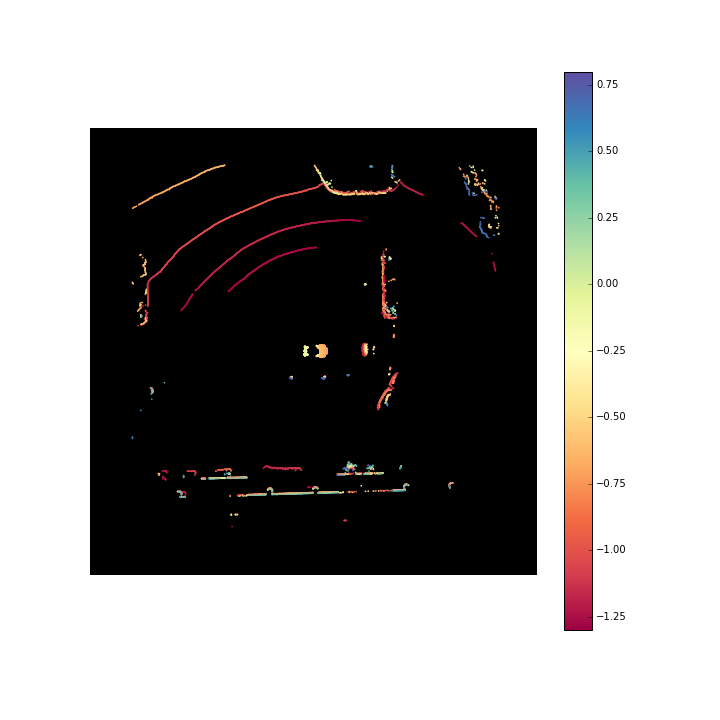

<function __main__.interaction>

In [201]:
%matplotlib notebook

def interaction(h=0.8,l=-1.3):
    
    global x_s
    global y_s
    global z_s
    global i_s
    global r_s
    
    reset_points()
    
    del_indeces = []
    del_count = 0
    for i in range(len(z_s)):
        if z_s[i] > h or z_s[i] < l:
            del_indeces.append(i-del_count)
            del_count += 1

    for index in del_indeces:
        del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]

    fig = plt.figure(frameon = False, figsize=(10,10))
    cm = plt.cm.get_cmap('Spectral')
    sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
    plt.axis('square')
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.patch.set_facecolor('black')
    ax.set_xlim([-30,30])
    ax.set_ylim([-30,30])
    plt.colorbar(sc)
    plt.show()
#     plt.clf()
    
interact(interaction, h=(-2.5,6), l=(-2.5,6))

## Works now!

### Although it seems the lidar or the whole car is slanted to it's left side, cuz the ground rings disappear gradually to the left

### Copy over the slider values to the below function to visualise in 2d and 3d

In [224]:
#done this way because del_ rearranges the array, error will be: Error: out of index!
reset_points()
del_indeces = []
del_count = 0

print(len(z_s))

for i in range(len(z_s)):
    if z_s[i] > 0.8 or z_s[i] < -1.30:
        del_indeces.append(i-del_count)
        del_count += 1
        
for index in del_indeces:
    del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]

plt.clf()

32916


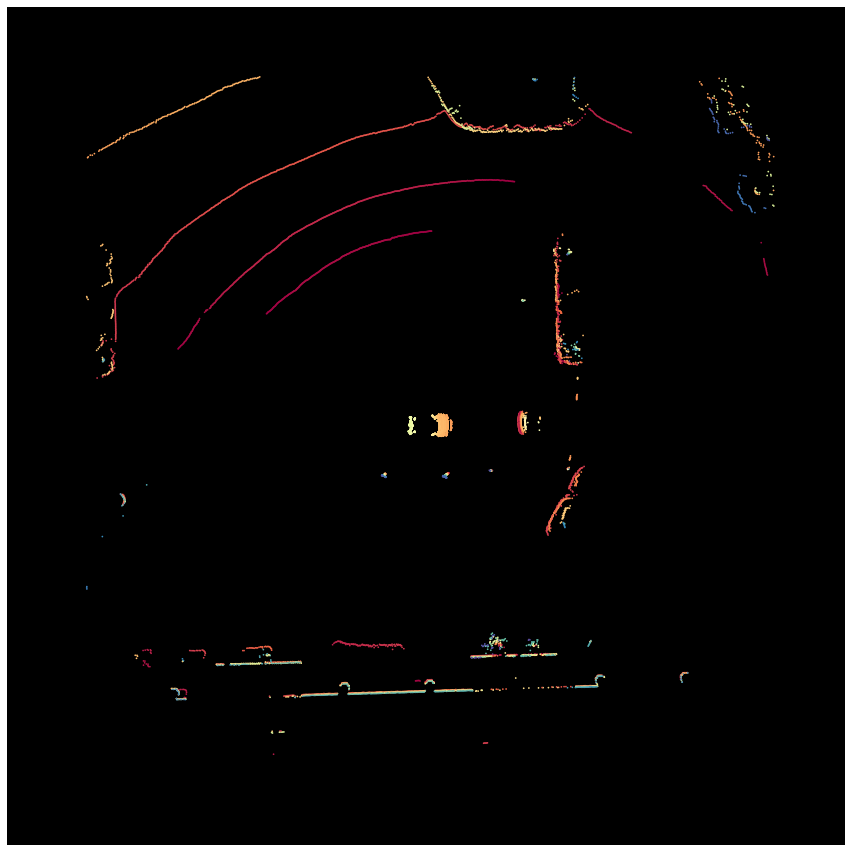

In [207]:
%matplotlib inline

fig = plt.figure(frameon = False, figsize=(15,15))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
# plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
plt.savefig("croppable_img.png", bbox_inches='tight', dpi=200, pad_inches=0.0)
plt.show()

In [49]:
fig = mayavi.mlab.figure(bgcolor=(0, 0, 0), size=(500, 500))

mayavi.mlab.points3d(x_s, y_s, z_s,
                     z_s, # distance values for color
                     mode="point",
                     colormap='spectral',
                     figure=fig,
                     )
mayavi.mlab.show()

# Extracting images features

(2325, 2325, 3)


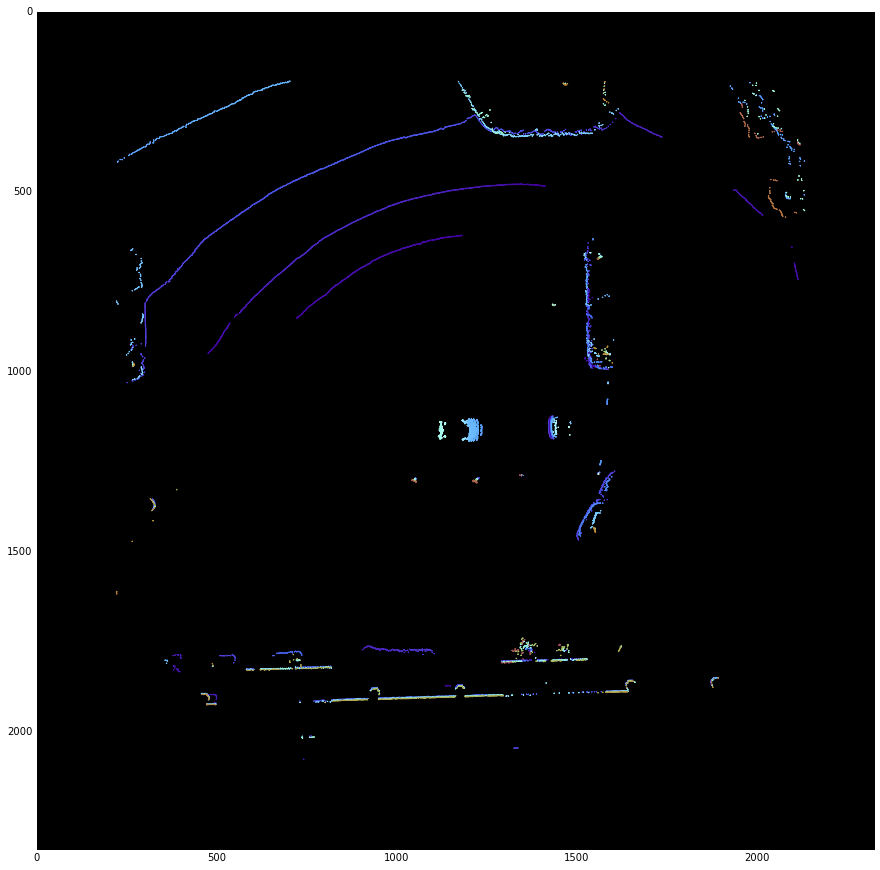

In [208]:
croppable_img = cv2.imread("croppable_img.png")
croppable_img2 = cv2.imread("croppable_img.png")
print(croppable_img.shape)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img)

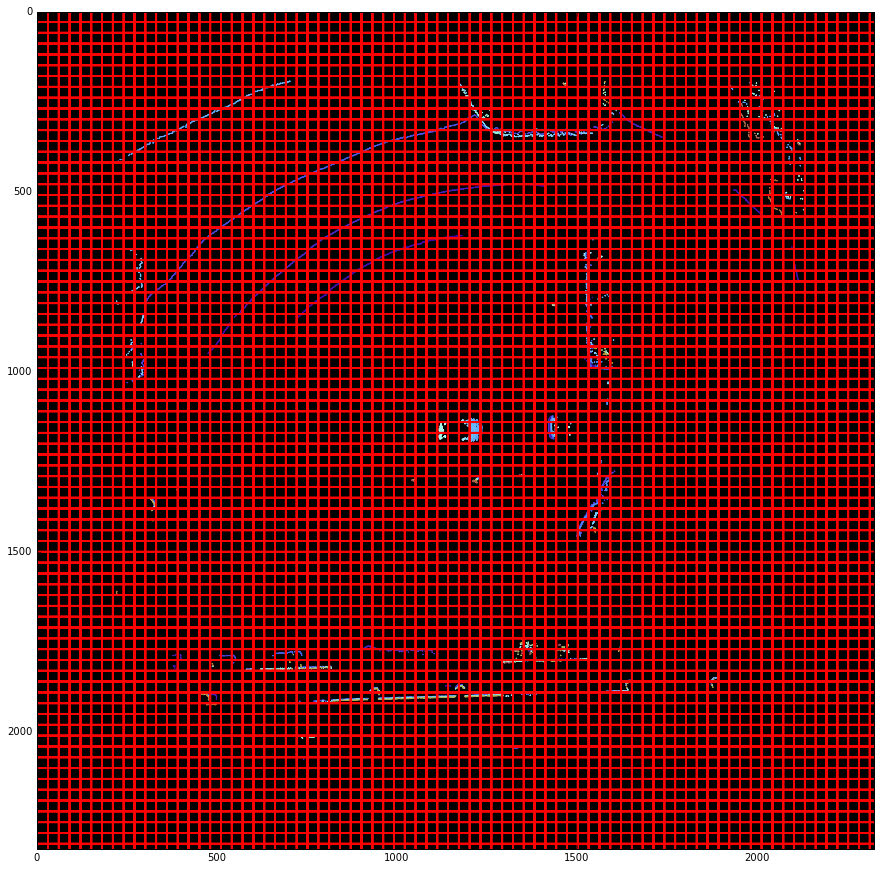

In [195]:
#grid size for person?
def grid_img(img, size):
    step = size
    while(step < img.shape[1]):
        cv2.line(img,(step,0),(step,img.shape[0]),(255,0,0),5)
        step += size
    step=size
    while(step < img.shape[0]):
        cv2.line(img,(0,step),(img.shape[1],step),(255,0,0),5)
        step += size
croppable_img1 = croppable_img
grid_img(croppable_img1,30)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img1)

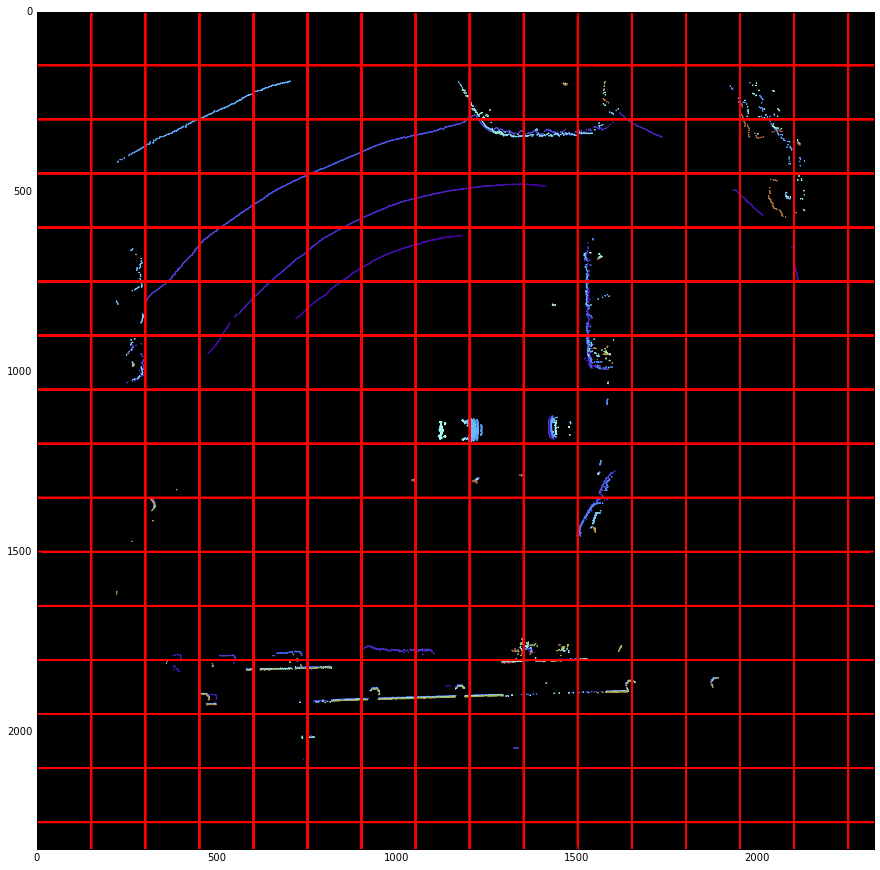

In [196]:
#grid size for car?
def grid_img(img, size):
    step = size
    while(step < img.shape[1]):
        cv2.line(img,(step,0),(step,img.shape[0]),(255,0,0),5)
        step += size
    step=size
    while(step < img.shape[0]):
        cv2.line(img,(0,step),(img.shape[1],step),(255,0,0),5)
        step += size
        
grid_img(croppable_img2,150)
plt.figure(figsize=(15,15))
plt.imshow(croppable_img2)

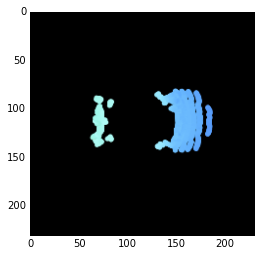

In [226]:
plt.imshow(croppable_img[1050:1280,1050:1280]) #size 230x230

In [223]:
cv2.imwrite("data/cars/img*.png", croppable_img[1000:1250,1100:1400])

True

# Time to try automating this...

## Within the folder you put this place the .npy file

## Create a folder called data and inside it a cars and notcars folder for later sorting

## this will extract all the frames to a folder



In [ ]:
img_count = 0
for frame in all_frames:
    img_count += 1
    #Extract the points
    x_s = []
    y_s = []
    z_s = []
    i_s = []
    r_s = []
    for x,y,z,i,r in frame:
        if abs(x) <= 25 and abs(y) <=25:
            x_s.append(x)
            y_s.append(y)
            z_s.append(z)
            i_s.append(i)
            r_s.append(r)
            
    #Filter on a height limit
    del_indeces = []
    del_count = 0

    for i in range(len(z_s)):
        if z_s[i] > 0.8 or z_s[i] < -1.30:
            del_indeces.append(i-del_count)
            del_count += 1

    for index in del_indeces:
        del z_s[index], x_s[index], y_s[index], i_s[index], r_s[index]
    
    #Image setup, plot, and save as full frame under the bag file's name
    fig = plt.figure(frameon = False, figsize=(15,15))
    cm = plt.cm.get_cmap('Spectral')
    sc = plt.scatter(x_s, y_s, c=z_s, s=3, edgecolors= '', cmap=cm)
    # plt.axis('square')
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.patch.set_facecolor('black')
    ax.set_xlim([-30,30])
    ax.set_ylim([-30,30])
    # plt.colorbar(sc)
    cwd = os.getcwd()
    directory = cwd + "/approach_1_velo_images"
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig((directory + "/img_" + str(img_count) + ".png"), bbox_inches='tight', dpi=200, pad_inches=0.0)
    
    #Load the image again for cropping
    croppable_img = cv2.imread(directory + "/img_" + str(img_count) + ".png")
    
    #ysize
    ysize = croppable_img.shape[0]
    #xsize
    xsize = croppable_img.shape[1]
    #step size
    step = 230
    #second run offset
    offset = 115
    
    cropped_img_count = 0
    for x_step in range(np.int(xsize/step)):
        for y_step in range(np.int(ysize/step)):
            cropped_img_count += 1
            cropped_img = croppable_img[step*x_step:step*x_step+step , step*y_step:step*y_step+step]
            cv2.imwrite(("data/cropped_img_" + str(cropped_img_count) + "_frame_" + str(img_count) + ".png"), cropped_img)
    
    cropped_img_count = 0
    for x_step in range(np.int(xsize/step)):
        for y_step in range(np.int(ysize/step)):
            cropped_img_count += 1
            cropped_img = croppable_img[offset+step*x_step:step*x_step+step , offset+step*y_step:step*y_step+step]
            cv2.imwrite(("data/cropped_img_" + str(cropped_img_count) + "_frame_wo_" + str(img_count) + ".png"), cropped_img)
    
print (img_count)

/home/da7th/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


# Extracting coordinate features

In [170]:
print ("x-axes limits: ", min(x_s), max(x_s), len(x_s))
print ("y-axes limits: ", min(y_s), max(y_s), len(y_s))
print ("z-axes limits: ", min(z_s), max(z_s), len(z_s))
print ("i-axes limits: ", min(i_s), max(i_s), len(i_s))
print ("r-axes limits: ", min(r_s), max(r_s), len(r_s))

x-axes limits:  -24.3009853363 24.954875946 9882
y-axes limits:  -23.5782279968 24.9758453369 9882
z-axes limits:  -1.2999587059 0.797508358955 9882
i-axes limits:  0.0 222.0 9882
r-axes limits:  0.0 31.0 9882


In [186]:
all_blocks = []
for x in range(-25,25,100):
    for y in range(-25,25,100):
        block = []
        xx = []
        yy = []
        zz = []
        ii = []
        rr = []
        for i in range(len(x_s)):
            
            if x_s[i] > x and x_s[i] < x+1 and y_s[i] > y and y_s[i] < i+1:
                xx.append(x_s[i])
                yy.append(y_s[i])
                zz.append(z_s[i])
                ii.append(i_s[i])
                rr.append(r_s[i])
                
        block.append([xx, yy, zz, ii, rr])
        
        all_blocks.append(block)
print(len(all_blocks))

1


In [187]:
print(len(all_blocks[0][0]))

5


In [188]:
count = 0

In [189]:
xplot = all_blocks[count][0][0] 
yplot = all_blocks[count][0][1] 
zplot = all_blocks[count][0][2] 
iplot = all_blocks[count][0][3] 
rplot = all_blocks[count][0][4]
count+=1

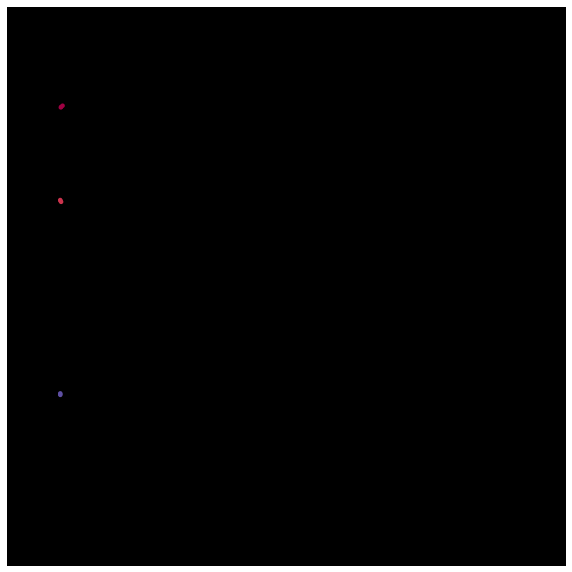

In [190]:
fig = plt.figure(frameon = False, figsize=(10,10))
cm = plt.cm.get_cmap('Spectral')
sc = plt.scatter(xplot,yplot, c=zplot, edgecolors= '', cmap=cm)
plt.axis('square')
ax = plt.gca()
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.patch.set_facecolor('black')
ax.set_xlim([-30,30])
ax.set_ylim([-30,30])
# plt.colorbar(sc)
plt.show()